#*Dataset extraído do Kaggle*

https://www.kaggle.com/brjapon/gearbox-fault-diagnosis

Carga = 70

In [2]:
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#algoritmos
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
#Importando a biblioteca das métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#para fazer o cross validation
from sklearn.model_selection import cross_val_score


In [3]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/BrokenTooth/b30hz70.csv?raw=true'

data1 = pd.read_csv(url_dados, sep= ',')

In [4]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/Healthy/h30hz70.csv?raw=true'

data2 = pd.read_csv(url_dados, sep= ',')

In [5]:
# inserindo o atributo de classe defeituosa
data1['class']= data1['a1'].apply(lambda x:1)

In [6]:
data1.describe()

,a1,a2,a3,a4,class
count,100864.000000,100864.000000,100864.000000,100864.000000,100864.0
mean,-0.000904,-0.000561,-0.006323,-0.001538,1.0
std,5.270876,4.687098,4.144201,4.907809,0.0
min,-24.837700,-29.210900,-19.272700,-21.672800,1.0
25%,-3.358650,-2.785288,-2.403012,-2.847530,1.0
50%,-0.090988,0.167050,0.052780,0.094538,1.0
75%,3.228580,2.992777,2.424740,2.938625,1.0
max,24.535900,21.457900,26.938900,26.310100,1.0


In [7]:
# inserindo o atributo de classe ok
data2['class']= data2['a1'].apply(lambda x:0)

In [8]:
data2.describe()

,a1,a2,a3,a4,class
count,101376.000000,101376.000000,101376.000000,101376.000000,101376.0
mean,0.015718,-0.003398,0.016392,-0.029492,0.0
std,8.170172,4.617839,4.593342,5.130183,0.0
min,-52.670900,-26.342200,-26.680300,-24.616800,0.0
25%,-4.788685,-2.745370,-2.659463,-2.945695,0.0
50%,-0.157715,0.093818,0.073383,0.152648,0.0
75%,4.704107,2.817028,2.732972,3.030765,0.0
max,51.094700,29.351100,24.273400,25.231200,0.0


In [9]:
data = pd.concat([data1,data2])

In [10]:
data

,a1,a2,a3,a4,class
0,-0.157490,1.526610,1.534550,-1.017460,1
1,1.160740,0.023445,1.704930,-3.502950,1
2,0.033562,0.045544,-0.431215,-5.582870,1
3,0.135058,0.525358,0.990718,-3.442710,1
4,1.760760,0.305720,2.149290,0.108471,1
...,...,...,...,...,...
101371,-17.360600,7.022290,-9.121040,0.734927,0
101372,-22.285400,-0.540992,-0.275450,-0.964922,0
101373,2.141050,11.010600,-2.304670,5.376580,0
101374,10.832000,-2.274780,5.258050,3.297100,0


In [11]:
#data.to_csv('File.csv', index = False)

In [12]:
data.describe()

,a1,a2,a3,a4,class
count,202240.000000,202240.000000,202240.000000,202240.000000,202240.000000
mean,0.007428,-0.001983,0.005063,-0.015550,0.498734
std,6.878669,4.652499,4.375111,5.020516,0.500000
min,-52.670900,-29.210900,-26.680300,-24.616800,0.000000
25%,-3.966260,-2.765223,-2.527405,-2.896223,0.000000
50%,-0.116878,0.130442,0.062905,0.121886,0.000000
75%,3.841258,2.900867,2.574745,2.985142,1.000000
max,51.094700,29.351100,26.938900,26.310100,1.000000


In [13]:
data.head()

,a1,a2,a3,a4,class
0,-0.157490,1.526610,1.534550,-1.017460,1
1,1.160740,0.023445,1.704930,-3.502950,1
2,0.033562,0.045544,-0.431215,-5.582870,1
3,0.135058,0.525358,0.990718,-3.442710,1
4,1.760760,0.305720,2.149290,0.108471,1


In [14]:
data_atrib = data.iloc[:,0:4]

In [15]:
data_atrib

,a1,a2,a3,a4
0,-0.157490,1.526610,1.534550,-1.017460
1,1.160740,0.023445,1.704930,-3.502950
2,0.033562,0.045544,-0.431215,-5.582870
3,0.135058,0.525358,0.990718,-3.442710
4,1.760760,0.305720,2.149290,0.108471
...,...,...,...,...
101371,-17.360600,7.022290,-9.121040,0.734927
101372,-22.285400,-0.540992,-0.275450,-0.964922
101373,2.141050,11.010600,-2.304670,5.376580
101374,10.832000,-2.274780,5.258050,3.297100


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

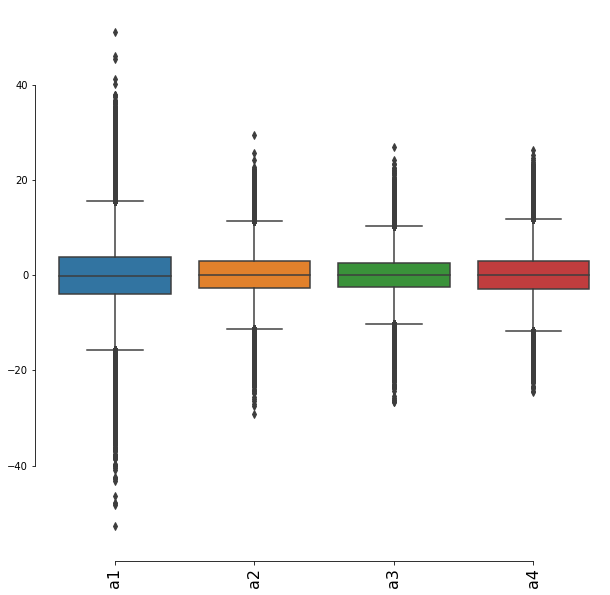

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_atrib)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90, fontsize=16)

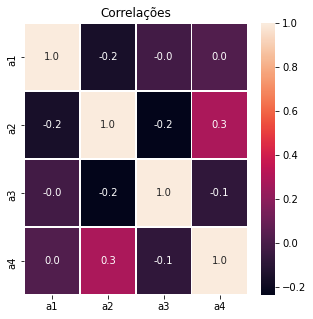

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_atrib.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlações')
plt.show()

In [18]:

g = sns.pairplot(data, hue='class', markers='+')
plt.show()
plt.figure(figsize=(10,10))

"\ng = sns.pairplot(data, hue='class', markers='+')\nplt.show()\n"

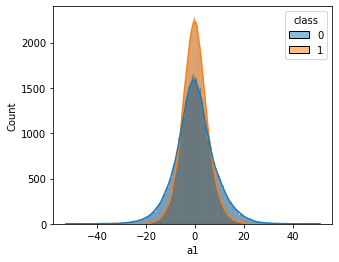

In [19]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a1", hue="class",kde=True)

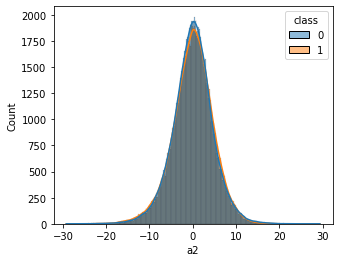

In [20]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a2", hue="class",kde=True)

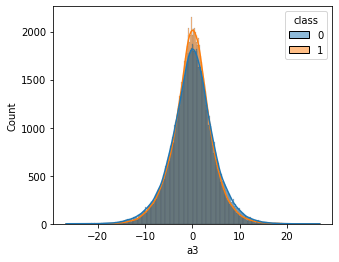

In [21]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a3", hue="class",kde=True)

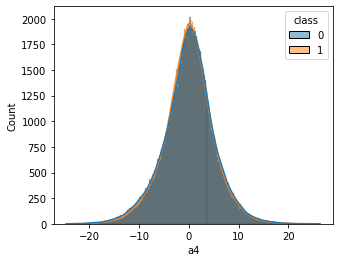

In [22]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a4", hue="class",kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


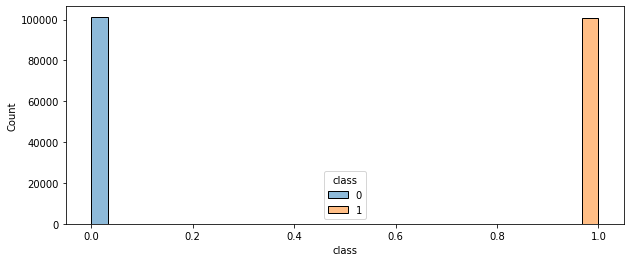

In [22]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=data, x="class", hue="class",kde=True)

In [25]:
# Split o dataset e definindo as variáveis de treino e teste 
X = data.drop("class", axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,stratify = y, random_state=42)

#Pré-processamento 

##retirarando os outliers

In [28]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer
RobustScaler()
Xr=transformer.transform(X)

In [29]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, test_size=1/3,stratify = y, random_state=42)

##Normalização

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data.iloc[:,:-1])

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [32]:
data_Norm = scaler.transform(data.iloc[:,:-1])

In [33]:
data_Norm = pd.DataFrame(scaler.transform(data.iloc[:,:-1]), columns=data.iloc[:,:-1].columns) 

In [34]:
data_Norm

,a1,a2,a3,a4
0,0.012155,0.049742,0.052416,-0.073207
1,0.037562,-0.001593,0.058771,-0.170817
2,0.015837,-0.000839,-0.020907,-0.252500
3,0.017793,0.015548,0.032131,-0.168452
4,0.049127,0.008047,0.075346,-0.028990
...,...,...,...,...
202235,-0.319422,0.237430,-0.345038,-0.004388
202236,-0.414343,-0.020870,-0.015097,-0.071144
202237,0.056457,0.373638,-0.090787,0.177899
202238,0.223968,-0.080082,0.191303,0.096234


In [35]:
#df_Normalized = pd.concat([data_Norm,data.iloc[:,-1]], axis=1)

In [36]:
Xn = data_Norm
yn = data['class']

In [37]:
data['class'].value_counts()

0    101376
1    100864
Name: class, dtype: int64

In [38]:
data_Norm['a1'].describe()

count    202240.000000
mean          0.015333
std           0.132581
min          -1.000000
25%          -0.061257
50%           0.012937
75%           0.089227
max           1.000000
Name: a1, dtype: float64

In [39]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=1/3,stratify = yn, random_state=42)

#Classificadores


##Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(X_train, y_train)
previsao_dummy = modelo_dummy.predict(X_test)
accuracy_score(y_test, previsao_dummy)

0.5012608656955528

##Árvores de Decisão

###Entropia

In [ ]:
#Variar os hiperparametros de tamanho da árvore
depth_range = list(range(1, 20))
print(depth_range)

param_grid_tree = dict(max_depth=depth_range)
print(param_grid_tree)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [ ]:
"""
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados também o tipo de algoritmo
param_grid_tree['criterion'] = ['entropy','gini']
"""

In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_tree = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid_tree, refit = True, verbose=3, cv=5)
grid_tree.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_tree.best_estimator_)
print("melhores Parâmetros: ",grid_tree.best_params_)
print("Melhor score: ",grid_tree.score(X_test, y_test))

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.532, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.534, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.533, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.535, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.533, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.569, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.570, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.569, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.568, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.569, total=   0.3s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed: 20.1min finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 9}
Melhor score:  0.6099326549381434


In [ ]:
#Criando objeto da árvore de decisão e treinando
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 9)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Computar a acurácia do teste
test_accuracy_tree = clf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_tree)

predictions_tree = clf.predict(X_test)
print(confusion_matrix(y_test, predictions_tree))
print(classification_report(y_test, predictions_tree))

Acurácia do teste =  0.6099474886522087
[[14395 19397]
 [ 6898 26724]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.52     33792
           1       0.58      0.79      0.67     33622

    accuracy                           0.61     67414
   macro avg       0.63      0.61      0.60     67414
weighted avg       0.63      0.61      0.60     67414



A precisão está ruím!!!! A quantidade de false positive está gigante.  Isto é, a quantidade que ele classifica como falha, mas que não foi falha está grande.

---

No entanto, a cobertura é muito boa


###CART

In [ ]:
#Variar os hiperparametros de tamanho da árvore
depth_cart = list(range(1, 20))
print(depth_cart)

param_grid_cart = dict(max_depth=depth_cart)
print(param_grid_cart)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_CART = GridSearchCV(DecisionTreeClassifier(criterion = 'gini'), param_grid_cart, refit = True, verbose=3, cv=5)
grid_CART.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_CART.best_estimator_)
print("melhores Parâmetros: ",grid_CART.best_params_)
print("Melhor score: ",grid_CART.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.532, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.534, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.533, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.535, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.532, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.569, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.570, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.571, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.570, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.571, total=   0.2s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.577, total=   0.3s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.1min finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 9}
Melhor score:  0.6101996617913193


In [ ]:
#Criando objeto da árvore de decisão e treinando
clfCART = tree.DecisionTreeClassifier(criterion = 'gini', max_depth= 9)
clfCART.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Computar a acurácia do teste
test_accuracy_CART = clfCART.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_CART)

predictions_CART = clfCART.predict(X_test)
print(confusion_matrix(y_test, predictions_CART))
print(classification_report(y_test, predictions_CART))

Acurácia do teste =  0.6102441629335152
[[14453 19339]
 [ 6936 26686]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.52     33792
           1       0.58      0.79      0.67     33622

    accuracy                           0.61     67414
   macro avg       0.63      0.61      0.60     67414
weighted avg       0.63      0.61      0.60     67414



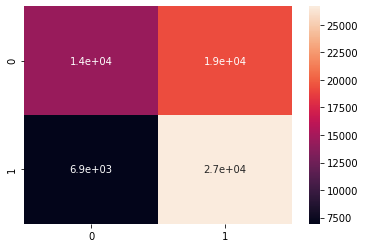

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions_CART))
sns.heatmap(cm, annot=True)

##Random Forest


In [ ]:
#Tentei usar um número grande de árvores votantes, mas ficou muito lento
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [ ]:
#Variar os hiperparametros de tamanho do número de árvores votantes
estimadores = [10,20,50,100]

In [ ]:
param_grid_RF = dict(n_estimators=estimadores)
print(param_grid_RF)

{'n_estimators': [10, 20, 50, 100]}


In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_RF = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_RF, refit = True, verbose=3, cv=5)
grid_RF.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_RF.best_estimator_)
print("melhores Parâmetros: ",grid_RF.best_params_)
print("Melhor score: ",grid_RF.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=10, score=0.569, total=   4.9s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.574, total=   4.9s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.572, total=   5.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.572, total=   4.9s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.573, total=   5.1s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.579, total=   9.6s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.587, total=   9.7s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.582, total=   9.6s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.582, total=   9.7s
[CV] n_estimators=20 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.3min finished


-----------------------------------------------------------
melhor estimador:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
melhores Parâmetros:  {'n_estimators': 100}
Melhor score:  0.5946539294508559


In [ ]:
#Criando objeto da árvore de decisão e treinando
rf = RandomForestClassifier(random_state = 42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Computar a acurácia do teste
test_accuracy_rf = rf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_rf)

predictions_rf = rf.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Acurácia do teste =  0.5946539294508559
[[18709 15083]
 [12243 21379]]
              precision    recall  f1-score   support

           0       0.60      0.55      0.58     33792
           1       0.59      0.64      0.61     33622

    accuracy                           0.59     67414
   macro avg       0.60      0.59      0.59     67414
weighted avg       0.60      0.59      0.59     67414



In [ ]:
#cm = pd.DataFrame(confusion_matrix(y_test, predictions_rf), columns=data.target_names, index=data.target_names)
#sns.heatmap(cm, annot=True)

##K-NN

Foi testado o grid para chegar no melhor k para o KNN, mas optou-se em testar todos os valores de k de forma direta.

In [ ]:
#Variar os parametros de tamanho do KNN
param_grid_KNN = dict(n_neighbors=list(range(1, 100,2)))
print(param_grid_KNN)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]}


In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose=3, cv=5)
grid_KNN.fit(Xn_train, yn_train)

print("-----------------------------------------------------------")
print("melhor estimador: ",grid_KNN.best_estimator_)
print("melhores Parâmetros: ",grid_KNN.best_params_)
print("Melhor score: ",grid_KNN.score(X_test, y_test))

"""

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=1, score=0.551, total=   0.9s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.557, total=   0.9s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.558, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.552, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.551, total=   0.9s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.564, total=   1.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.570, total=   1.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.568, total=   1.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.567, total=   1.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
#treinando o KNN com os melhores parâmetros
KNN = KNeighborsClassifier(n_neighbors=95)
KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=95, p=2,
                     weights='uniform')

In [ ]:
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))

Acurácia do teste = 0.6167
[[16617 17175]
 [ 8667 24955]]
              precision    recall  f1-score   support

           0       0.66      0.49      0.56     33792
           1       0.59      0.74      0.66     33622

    accuracy                           0.62     67414
   macro avg       0.62      0.62      0.61     67414
weighted avg       0.62      0.62      0.61     67414



In [ ]:
ListaKNN={}
res_test = []
test_accuracy = 0
val_max = 200
for i in range(1,val_max,2):
  KNN_teste = KNeighborsClassifier(n_neighbors=i)
  KNN_teste.fit(Xn_train, yn_train)
  #Computar a acurácia do teste
  test_accuracy = KNN_teste.score(Xn_test, yn_test)
  res_test.append(test_accuracy) 
  #print('Com k = ',i, ', a Acurácia do teste = ' ,test_accuracy)
  ListaKNN['KNN'+str(i)]=round(test_accuracy,3)

In [ ]:
neighbors = np.arange(1,val_max,2)

In [ ]:
valoresKNN = []
for item in ListaKNN.values():
  valoresKNN.append(item)

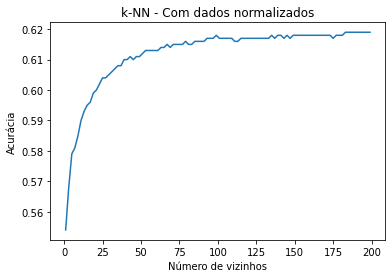

In [ ]:
#Generate plot
plt.title('k-NN - Com dados normalizados')
plt.plot(neighbors,valoresKNN, label='Acurácia do Teste')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [ ]:
max(ListaKNN, key=ListaKNN.get)

'KNN183'

In [ ]:
max(res_test)

0.6193372296555612

In [ ]:
ListaKNN['KNN183']

0.619

In [ ]:
#treinando o KNN com o k de maior acurárica
KNN = KNeighborsClassifier(n_neighbors=183)
KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=183, p=2,
                     weights='uniform')

In [ ]:
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))

Acurácia do teste = 0.6185
[[16002 17790]
 [ 7926 25696]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55     33792
           1       0.59      0.76      0.67     33622

    accuracy                           0.62     67414
   macro avg       0.63      0.62      0.61     67414
weighted avg       0.63      0.62      0.61     67414



##NB

In [36]:
#Fazendo um dicionário chamado param_grid contendo os hiperparâmetros que serão variados
parameters_NB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

In [37]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
grid_NB = GridSearchCV(GaussianNB(), parameters_NB, refit = True, verbose=3, cv=10)
grid_NB.fit(X_train, y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.577, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.584, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.582, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.584, total=   0.0s
[CV] var_smoothing=0.01 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. var_smoothing=0.01, score=0.580, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.583, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.580, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.585, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.581, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.585, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.577, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_NB.best_estimator_)
print("melhores Parâmetros: ",grid_NB.best_params_)
print("Melhor score: ",grid_NB.score(X_test, y_test))

-----------------------------------------------------------
melhor estimador:  GaussianNB(priors=None, var_smoothing=0.01)
melhores Parâmetros:  {'var_smoothing': 0.01}
Melhor score:  0.5816744296436942


In [ ]:
# treinando com os melhores parâmetros
NB = GaussianNB(var_smoothing = 0.01)
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.01)

In [ ]:
#Computar a acurácia do teste
test_accuracy_NB = NB.score(X_test, y_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_NB))

predictions_NB = NB.predict(X_test)
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test, predictions_NB))

Acurácia do teste = 0.5817
[[13134 20658]
 [ 7543 26079]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.48     33792
           1       0.56      0.78      0.65     33622

    accuracy                           0.58     67414
   macro avg       0.60      0.58      0.57     67414
weighted avg       0.60      0.58      0.57     67414



##SVM

SVM levando muito tempo.  Não será levado em consideração?

In [ ]:
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados C e Gamma
param_SVM = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001],'kernel':['rbf', 'poly'],'degree':[2, 3, 4, 5]}

In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)
grid_SVM.fit(Xn_train, yn_train)"""

'grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)\ngrid_SVM.fit(Xn_train, yn_train)'

In [ ]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [ ]:
"""# treinando com os melhores parâmetros
SVM = SVC(kernel='poly')
SVM.fit(Xn_train, yn_train)"""

"# treinando com os melhores parâmetros\nSVM = SVC(kernel='poly')\nSVM.fit(Xn_train, yn_train)"

In [ ]:
"""#Computar a acurácia do teste
test_accuracy_SVM = SVM.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_SVM))

predictions_SVM = SVM.predict(X_test)
print(confusion_matrix(yn_test, predictions_SVM))
print(classification_report(yn_test, predictions_SVM))"""

'#Computar a acurácia do teste\ntest_accuracy_SVM = SVM.score(Xn_test, yn_test)\nprint("Acurácia do teste = %0.4f" % (test_accuracy_SVM))\n\npredictions_SVM = SVM.predict(X_test)\nprint(confusion_matrix(yn_test, predictions_SVM))\nprint(classification_report(yn_test, predictions_SVM))'

##MLP

Grid levando muito tempo.  Hiperparâmetros não serão variados

In [ ]:
# Criando objeto e treinando o modelo
MLP = MLPClassifier(max_iter=10000)


In [ ]:
#Além dos parâmetros de neurônios das camadas intermediárias, busquei variar outros para avaliar os resultados.
parameter_space2 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
   
}

In [ ]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
"""
grid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)
grid_MLP.fit(Xn_train, yn_train)
"""

'\ngrid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)\ngrid_MLP.fit(Xn_train, yn_train)\n'

In [ ]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [ ]:
# Treinando o modelo
MLP = MLPClassifier(max_iter=10000)
MLP.fit(Xn_train, yn_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Computar a acurácia do teste
test_accuracy_MLP = MLP.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_MLP))

predictions_MLP = MLP.predict(X_test)
print(confusion_matrix(yn_test, predictions_MLP))
print(classification_report(yn_test, predictions_MLP))

Acurácia do teste = 0.6194
[[32687  1105]
 [31682  1940]]
              precision    recall  f1-score   support

           0       0.51      0.97      0.67     33792
           1       0.64      0.06      0.11     33622

    accuracy                           0.51     67414
   macro avg       0.57      0.51      0.39     67414
weighted avg       0.57      0.51      0.39     67414





---



---



#Teste da acurácia com diversos modelos usando o 10-fold cross validation para comparação

In [40]:
seed=42
models = []
models_results = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 9)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 9)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=183)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.01)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))

#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, Xn_train, yn_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    lista = [name, cv_results.mean(), cv_results.std()]
    models_results.append(lista)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.607820 (0.002780)
CART: 0.607501 (0.002963)
LR: 0.497448 (0.005140)
LDA: 0.497434 (0.005123)
KNN: 0.617314 (0.003350)
NB: 0.582061 (0.003738)
Random Forest: 0.593335 (0.003565)
Isolation Forest: 0.444180 (0.003397)
MLP: 0.620073 (0.003863)


In [41]:
models_results

[['TREE', 0.6078204096048997, 0.0027798560761793448],
 ['CART', 0.6075014751800889, 0.002962952813419414],
 ['LR', 0.4974484459340432, 0.00514017456986631],
 ['LDA', 0.4974336129901359, 0.005123290356655144],
 ['KNN', 0.6173141577030586, 0.0033500256802713145],
 ['NB', 0.5820614063303196, 0.0037375996996678795],
 ['Random Forest', 0.5933350625873435, 0.0035654165762744245],
 ['Isolation Forest', 0.44417988409432124, 0.0033972543009691395],
 ['MLP', 0.6200732904653938, 0.003862638866288782]]

In [42]:
df_results = pd.DataFrame(models_results, 
                          columns = ['modelo','Acuracia_k-fold=10','Desvio-padrão'])
df_results.sort_values(by='Acuracia_k-fold=10', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,modelo,Acuracia_k-fold=10,Desvio-padrão
0,MLP,0.620073,0.003863
1,KNN,0.617314,0.003350
2,TREE,0.607820,0.002780
3,CART,0.607501,0.002963
4,Random Forest,0.593335,0.003565
5,NB,0.582061,0.003738
6,LR,0.497448,0.005140
7,LDA,0.497434,0.005123
8,Isolation Forest,0.444180,0.003397


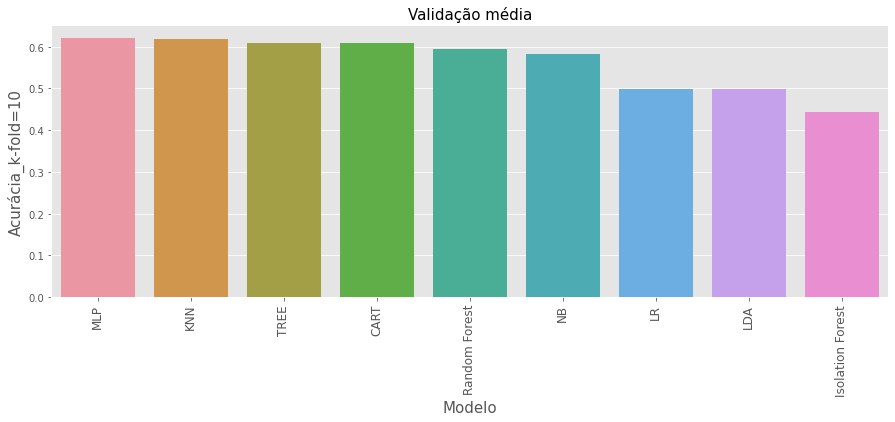

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10", data = df_results)
plt.title('Validação média', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [44]:
models


[('TREE',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=9, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=9, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
              

# PCA

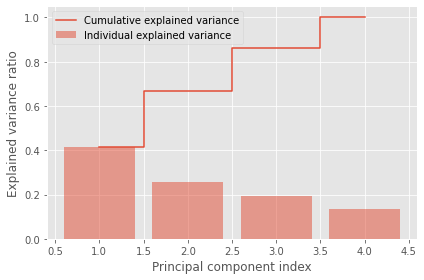

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(Xn_train)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [46]:
N=3
columns_vector = ['element '+str(i) for i in range(1,N+1)]
pca = PCA(n_components=3)
df_PCA = pca.fit_transform(data_Norm)
df_PCA = pd.DataFrame(data = df_PCA
             , columns = columns_vector)
df_PCA

,element 1,element 2,element 3
0,0.023605,0.007409,0.065614
1,0.132036,-0.012191,0.041704
2,0.177277,-0.116896,0.034925
3,0.113974,-0.040714,0.051459
4,0.013966,0.065892,0.020094
...,...,...,...
202235,-0.242576,-0.381744,0.190337
202236,0.024019,-0.068176,0.273221
202237,-0.378235,-0.100128,0.104438
202238,-0.011426,0.269169,-0.114103


###Treino e Teste com os dados após o PCA

In [47]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA, y, test_size=1/3,stratify = y, random_state=42)

In [ ]:
seed=42
models = []
models_results_pca = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 9)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 9)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=183)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.01)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results_pca = []
names_pca = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train_pca, y_train_pca, cv=kfold, scoring=scoring)
    results_pca.append(cv_results)
    names_pca.append(name)
    listapca = [name, cv_results.mean(), cv_results.std()]
    models_results_pca.append(listapca)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.556198 (0.004835)
CART: 0.556191 (0.004508)
LR: 0.494882 (0.006724)
LDA: 0.494882 (0.006704)
KNN: 0.556413 (0.002717)
NB: 0.528370 (0.003153)
Random Forest: 0.530365 (0.003116)
Isolation Forest: 0.426209 (0.006045)
MLP: 0.562303 (0.003522)


In [ ]:
models_results_pca

In [ ]:
df_results_pca = pd.DataFrame(models_results_pca, 
                          columns = ['modelo','Acuracia_k-fold=10 com PCA','Desvio-padrão'])
df_results_pca.sort_values(by='Acuracia_k-fold=10 com PCA', ascending=False, inplace=True)
df_results_pca.reset_index(inplace=True,drop=True)
df_results_pca

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10 com PCA", data = df_results_pca)
plt.title('Validação média com PCA', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()